Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")


plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

t0 = 58854.2

In [2]:
fullDF = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/ryanSpectraPhotometry_rband.txt", header=None, names=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], delim_whitespace=True)

In [3]:
fullDF['band'] = np.array(['U', 'B', 'V', 'g','r', 'i', 'z'])

In [4]:
fullDF.index = fullDF['band']

In [5]:
del fullDF['band']

In [6]:
orderedDF = fullDF.T
#.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/spectraPhotometry_transposed.txt",index=False)

specMJD = np.array([58857.3, 58864.6, 58868.6, 58870.5, 58872.4, 58875.0, 58876.7, 58879.4, 58880.3, 58880.4, 58892.0, 58895.0, 58995.6])


In [7]:
orderedDF['MJD'] = specMJD
#orderedDF.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/spectraPhotometry_transposed_rBand.txt",index=False)

In [8]:
orderedDF['ph'] = orderedDF['MJD'] - t0

In [54]:
import scipy.interpolate as interp

#import the gaussian processes
GP_results = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/interpolated_lcs/GPResults_2020oi_withSBO2_Trunc.csv")

f_r = interp.interp1d(GP_results['MJD']-t0, GP_results['rp_LC'], fill_value='extrapolate')
f_g = interp.interp1d(GP_results['MJD']-t0, GP_results['gp_LC'], fill_value='extrapolate')
f_B = interp.interp1d(GP_results['MJD']-t0, GP_results['B_LC'], fill_value='extrapolate')

f_Ustd = interp.interp1d(GP_results['MJD']-t0, GP_results['U_std'], fill_value='extrapolate')
f_Bstd = interp.interp1d(GP_results['MJD']-t0, GP_results['B_std'], fill_value='extrapolate')
f_Vstd = interp.interp1d(GP_results['MJD']-t0, GP_results['V_std'], fill_value='extrapolate')
f_gstd = interp.interp1d(GP_results['MJD']-t0, GP_results['gp_std'], fill_value='extrapolate')
f_rstd = interp.interp1d(GP_results['MJD']-t0, GP_results['rp_std'], fill_value='extrapolate')
f_istd = interp.interp1d(GP_results['MJD']-t0, GP_results['i_std'], fill_value='extrapolate')
f_zstd = interp.interp1d(GP_results['MJD']-t0, GP_results['z_std'], fill_value='extrapolate')

Text(0, 0.5, 'V-Band Magnitude')

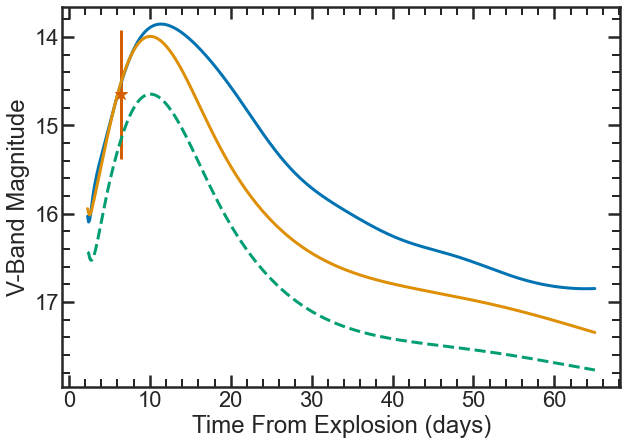

In [65]:
sns.set_context("poster")
plt.figure(figsize=(10,7))
plt.plot(GP_results['MJD']-t0,f_r(GP_results['MJD']-t0))
plt.plot(GP_results['MJD']-t0,f_g(GP_results['MJD']-t0))
plt.plot(GP_results['MJD']-t0,f_B(GP_results['MJD']-t0), '--')
#14.645284649999999 +/- 0.7330332752454382
plt.errorbar(6.4, 14.65, yerr=0.733, marker='*')
plt.gca().invert_yaxis()
plt.xlabel("Time From Explosion (days)")
plt.ylabel("V-Band Magnitude")

In [42]:
#f_g(6.4)

B = 0.118082 + 14.52720265

In [44]:
B

14.645284649999999

In [45]:
orderedDF['r'] = f_r(orderedDF['ph'])

orderedDF['U_std'] = f_Ustd(orderedDF['ph'])
orderedDF['B_std'] = f_Bstd(orderedDF['ph'])
orderedDF['V_std'] = f_Vstd(orderedDF['ph'])
orderedDF['g_std'] = f_gstd(orderedDF['ph'])
orderedDF['r_std'] = f_rstd(orderedDF['ph'])
orderedDF['i_std'] = f_istd(orderedDF['ph'])
orderedDF['z_std'] = f_zstd(orderedDF['ph'])

In [47]:
f_Bstd(6.4)

array(0.03356898)

In [48]:
0.05*14.645284649999999

0.7322642325

In [50]:
np.sqrt(0.7322642325**2 + 0.03356898**2)

0.7330332752454382

In [12]:
#add V to every band
orderedDF['B'] += orderedDF['r']
orderedDF['V'] += orderedDF['r']
orderedDF['g'] += orderedDF['r']
#orderedDF['r'] += orderedDF['r']
orderedDF['i'] += orderedDF['r']
orderedDF['z'] += orderedDF['r']

In [13]:
orderedDF

band,U,B,V,g,r,i,z,MJD,ph,U_std,B_std,V_std,g_std,r_std,i_std,z_std
1,NaN,16.195598,15.694248,16.009093,15.722982,15.793469,15.742931,58857.3,3.1,0.090657,0.042419,0.082815,0.003537,0.015975,0.020740,0.171578
2,NaN,14.838916,13.972501,14.572894,13.873170,14.031083,14.009780,58864.6,10.4,0.078893,0.024756,0.040077,0.003775,0.018171,0.020564,0.022667
3,NaN,15.163563,14.181495,14.850270,13.982023,14.075680,14.014947,58868.6,14.4,0.083690,0.018409,0.030858,0.003856,0.015218,0.018674,0.022770
4,NaN,15.558632,14.420900,15.173612,14.146192,14.144531,14.003962,58870.5,16.3,0.083770,0.016406,0.028419,0.003882,0.014385,0.017600,0.020300
5,NaN,15.677620,14.706313,15.328164,14.347720,14.032727,NaN,58872.4,18.2,0.082559,0.015102,0.027140,0.003902,0.014481,0.017526,0.018383
6,NaN,15.750450,15.032845,15.501103,14.668820,14.492062,NaN,58875.0,20.8,0.079795,0.014366,0.027042,0.003917,0.015118,0.017922,0.019211
7,NaN,16.637408,15.372021,16.131918,14.896138,14.275094,NaN,58876.7,22.5,0.078006,0.014406,0.027689,0.003920,0.016047,0.018750,0.020630
8,NaN,NaN,15.271314,15.448249,15.246476,15.208165,NaN,58879.4,25.2,0.076285,0.014979,0.029140,0.003913,0.017280,0.020737,0.022437
9,NaN,16.638797,15.710721,16.340589,15.351677,15.229343,NaN,58880.3,26.1,0.076140,0.015242,0.029617,0.003908,0.017112,0.020832,0.023190
10,NaN,15.889591,15.498019,15.729158,15.362860,15.373367,14.926649,58880.4,26.2,0.076138,0.015272,0.029667,0.003907,0.017074,0.020815,0.023288


In [14]:
#orderedDF.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/spectrophotometry_rBand.csv",index=False)

In [15]:
orderedDF

band,U,B,V,g,r,i,z,MJD,ph,U_std,B_std,V_std,g_std,r_std,i_std,z_std
1,NaN,16.195598,15.694248,16.009093,15.722982,15.793469,15.742931,58857.3,3.1,0.090657,0.042419,0.082815,0.003537,0.015975,0.020740,0.171578
2,NaN,14.838916,13.972501,14.572894,13.873170,14.031083,14.009780,58864.6,10.4,0.078893,0.024756,0.040077,0.003775,0.018171,0.020564,0.022667
3,NaN,15.163563,14.181495,14.850270,13.982023,14.075680,14.014947,58868.6,14.4,0.083690,0.018409,0.030858,0.003856,0.015218,0.018674,0.022770
4,NaN,15.558632,14.420900,15.173612,14.146192,14.144531,14.003962,58870.5,16.3,0.083770,0.016406,0.028419,0.003882,0.014385,0.017600,0.020300
5,NaN,15.677620,14.706313,15.328164,14.347720,14.032727,NaN,58872.4,18.2,0.082559,0.015102,0.027140,0.003902,0.014481,0.017526,0.018383
6,NaN,15.750450,15.032845,15.501103,14.668820,14.492062,NaN,58875.0,20.8,0.079795,0.014366,0.027042,0.003917,0.015118,0.017922,0.019211
7,NaN,16.637408,15.372021,16.131918,14.896138,14.275094,NaN,58876.7,22.5,0.078006,0.014406,0.027689,0.003920,0.016047,0.018750,0.020630
8,NaN,NaN,15.271314,15.448249,15.246476,15.208165,NaN,58879.4,25.2,0.076285,0.014979,0.029140,0.003913,0.017280,0.020737,0.022437
9,NaN,16.638797,15.710721,16.340589,15.351677,15.229343,NaN,58880.3,26.1,0.076140,0.015242,0.029617,0.003908,0.017112,0.020832,0.023190
10,NaN,15.889591,15.498019,15.729158,15.362860,15.373367,14.926649,58880.4,26.2,0.076138,0.015272,0.029667,0.003907,0.017074,0.020815,0.023288


In [30]:
frac = 0.05

orderedDF['UcErr'] = frac*orderedDF['U']
orderedDF['BcErr'] = frac*orderedDF['B']
orderedDF['VcErr'] = frac*orderedDF['V']
orderedDF['gcErr'] = frac*orderedDF['g']
#orderedDF['gpcErr'] = frac*orderedDF['gp']
orderedDF['rcErr'] = frac*0.0
orderedDF['rpcErr'] = frac*0.0
orderedDF['icErr'] = frac*orderedDF['i']
orderedDF['zcErr'] = frac*orderedDF['z']

#58892.0   +6.4


In [29]:
orderedDF['U_totErr'] = np.sqrt(orderedDF['UcErr']**2 + orderedDF['U_std']**2)
orderedDF['B_totErr'] = np.sqrt(orderedDF['BcErr']**2 + orderedDF['B_std']**2)
orderedDF['V_totErr'] = np.sqrt(orderedDF['VcErr']**2 + orderedDF['V_std']**2)
orderedDF['g_totErr'] = np.sqrt(orderedDF['gcErr']**2 + orderedDF['g_std']**2)
orderedDF['r_totErr'] = np.sqrt(orderedDF['rcErr']**2 + orderedDF['r_std']**2)
orderedDF['i_totErr'] = np.sqrt(orderedDF['icErr']**2 + orderedDF['i_std']**2)
orderedDF['z_totErr'] = np.sqrt(orderedDF['zcErr']**2 + orderedDF['z_std']**2)

In [25]:
orderedDF['U_totErr'] = 0.5*orderedDF['U_totErr']
orderedDF['B_totErr'] = 0.5*orderedDF['B_totErr']
orderedDF['V_totErr'] = 0.5*orderedDF['V_totErr']
orderedDF['g_totErr'] = 0.5*orderedDF['g_totErr']
orderedDF['r_totErr'] = 0.5*orderedDF['r_totErr']
orderedDF['i_totErr'] = 0.5*orderedDF['i_totErr']
orderedDF['z_totErr'] = 0.5*orderedDF['z_totErr']

In [26]:
orderedDF['U_totErr'] = 0.5*orderedDF['U_totErr']
bands = np.array(['B', 'V', 'g', 'r', 'i', 'z'])

allDFs = []
for i in np.arange(len(bands)):
    tempDF = pd.DataFrame({"MJD":orderedDF['MJD'], "MAG":orderedDF[bands[i]], "MAGERR":orderedDF["%s_totErr"%bands[i].strip("p")], "FLT":[bands[i]]*len(orderedDF['MJD']), "TELESCOPE":['Synthetic']*len(orderedDF['MJD']), "INSTRUMENT":['Synthetic']*len(orderedDF['MJD'])})
    allDFs.append(tempDF)

In [27]:
syntheticPhot = pd.concat(allDFs, ignore_index=True)
#syntheticPhot.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/syntheticPhotometry_rBand.csv",index=False)

In [21]:
syntheticPhot['ULIM'] = 0

In [22]:
syntheticPhot.dropna(subset=['MAG'], inplace=True)

In [75]:
SN2020oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry.csv")

In [76]:
SN2020oi_comb = pd.concat([syntheticPhot, SN2020oi], ignore_index=True)

In [77]:
SN2020oi_comb.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_wSynthetic_rBand.csv",index=False)

In [79]:
SNclean = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wUVOT.csv")

SN2020oi_comb_clean = pd.concat([syntheticPhot, SN2020oi], ignore_index=True)

#the blue spectrum covers both B and g, and so I can get a B-g color:
#0.118082

SN2020oi_comb_clean.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wSynthetic.csv",index=False)

In [68]:
orderedDF['gp'] = orderedDF['g']
orderedDF['rp'] = orderedDF['r']

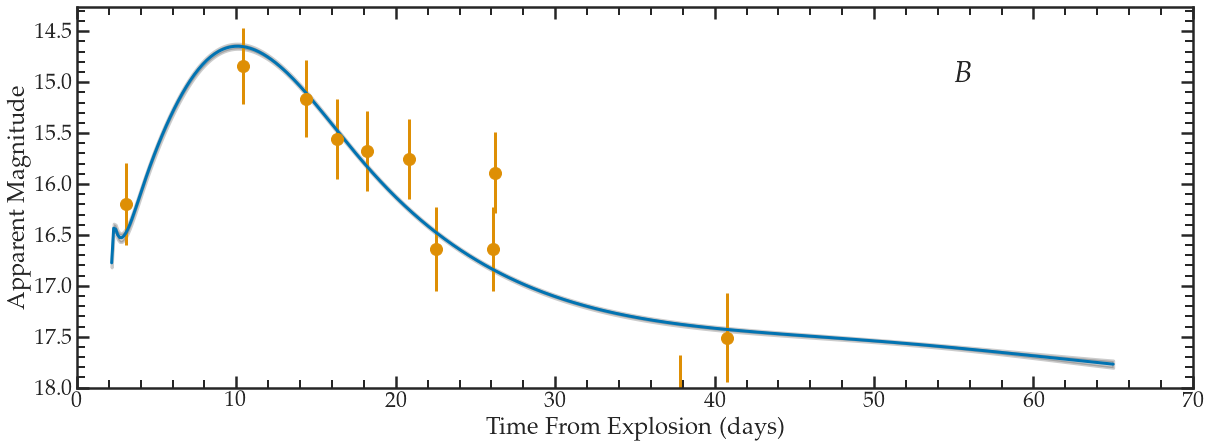

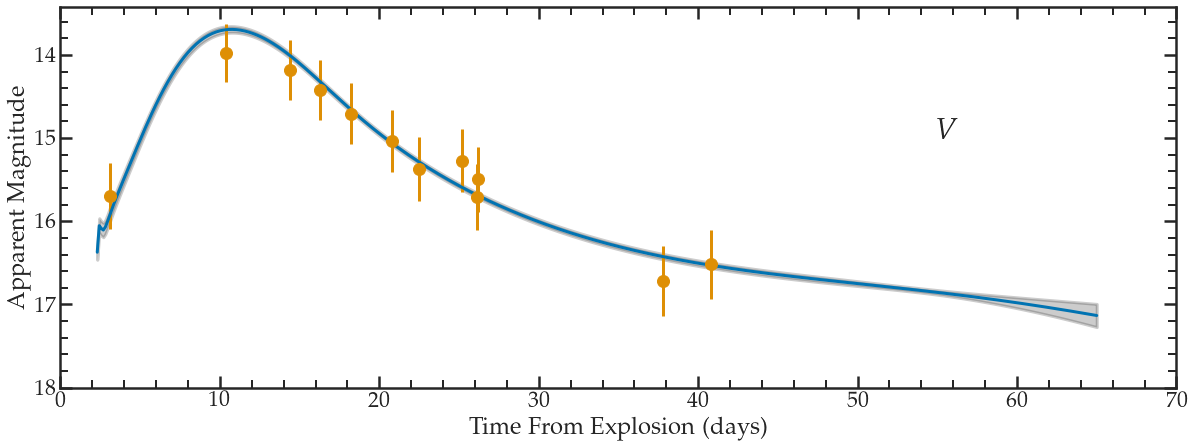

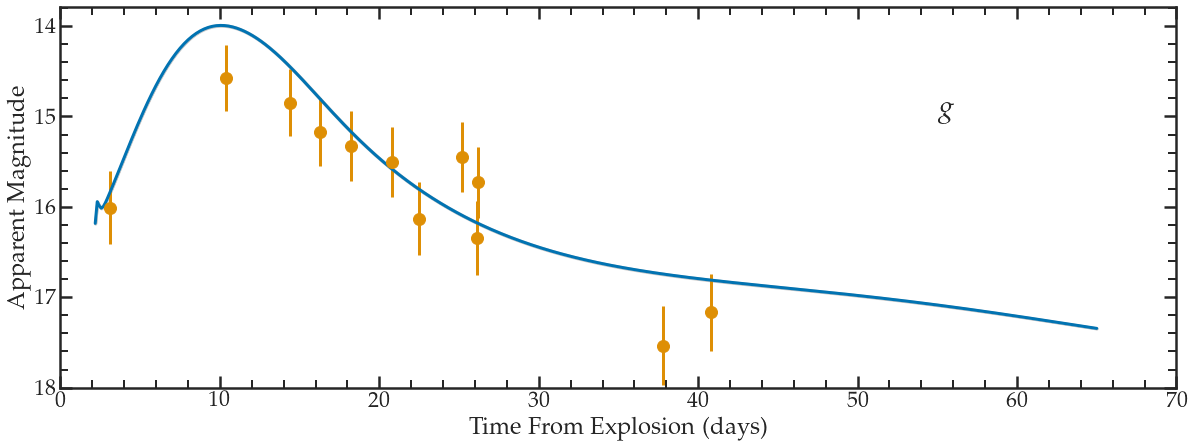

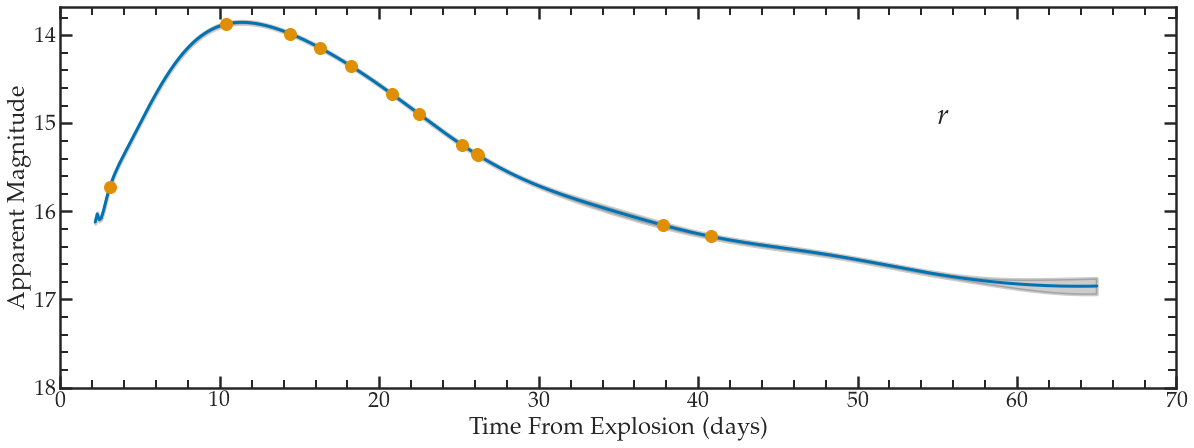

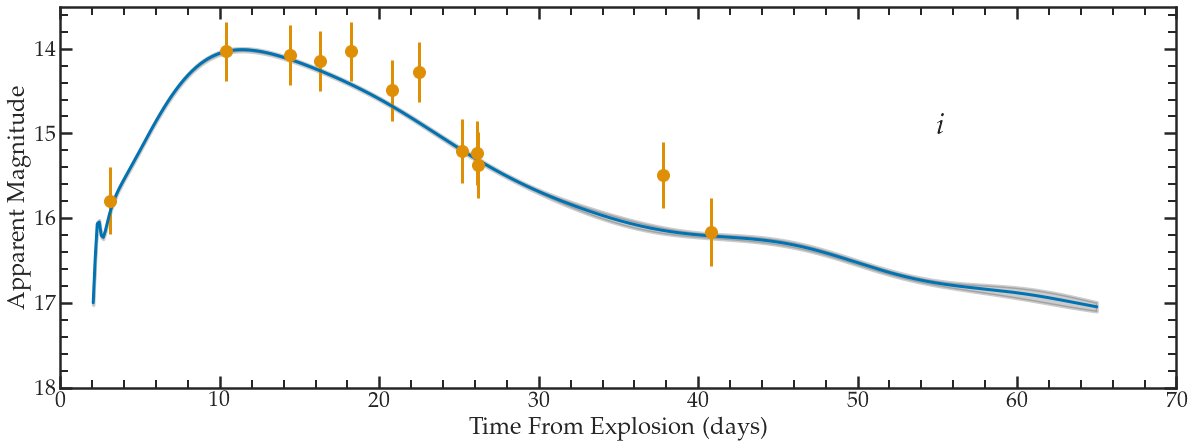

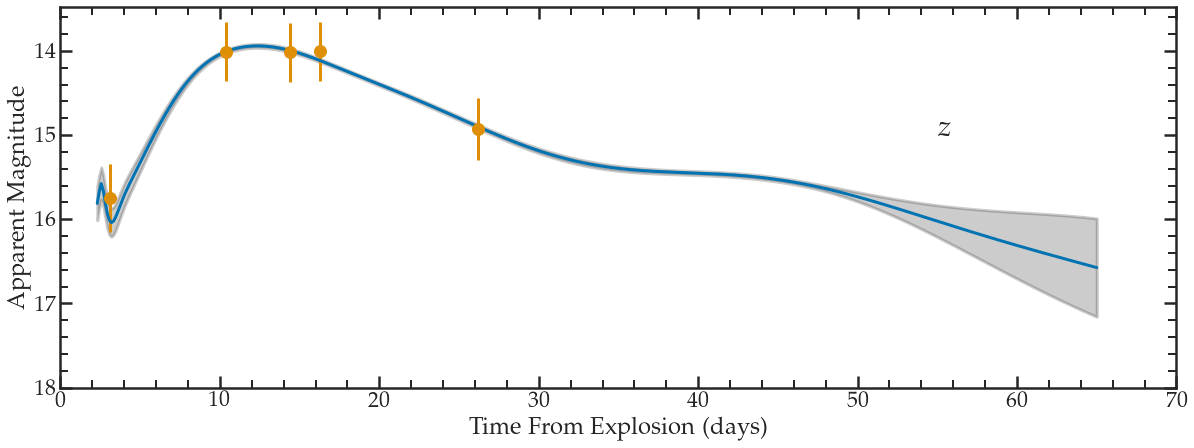

In [69]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
    
bands = np.array(['B', 'V', 'gp', 'rp', 'i', 'z'])

for i in np.arange(len(bands)):
    plt.figure(figsize=(20,7))
    plt.plot(GP_results['MJD']-t0, GP_results['%s_LC'%bands[i]])
    plt.errorbar(orderedDF['ph'], orderedDF['%s'%bands[i]], orderedDF['%s_totErr'%bands[i].strip("p")]/2., fmt='o')
    plt.fill_between(GP_results['MJD']-t0, GP_results['%s_LC'%bands[i]] - GP_results['%s_std'%bands[i]], GP_results['%s_LC'%bands[i]] + GP_results['%s_std'%bands[i]],lw=3, color='k', alpha=0.2)
    plt.gca().invert_yaxis()
    plt.text(55, 15.0, r"$%s$"%bands[i].strip("p"), fontsize=30)
    plt.xlabel("Time From Explosion (days)")
    plt.ylabel("Apparent Magnitude")
    plt.xlim((0, 70))
    plt.ylim(ymin=18)
    plt.savefig("2020oi_syntheticMagnitudes_%s.png"%bands[i],dpi=200, bbox_inches='tight')